# 数据降维

在统计学和机器学习中，存在所谓“**维数的灾难**”（**the curse of dimensionality**），特别是对于高度非参数的模型，该问题更加严重。

比如，如果我们考虑使用高阶多项式进行拟合：$$y_i=p\left(x_i\right)+u_i$$如果有$K$个解释变量，那么一阶多项式有$K+1$（包含常数项）个参数，而二阶多项式（包含交叉项）就有$C_K^2+K$个参数......随着多项式阶数的增加，未知参数的个数是指数级增加的，然而样本量是有限的，这就会导致模型的过拟合甚至完全拟合的情况。

另一个例子是在匹配（matching）中，如果特征只有一维，那么匹配是非常容易的，然而当维度扩大到比较多维度时，一个样本的周围就很难找到距离近的能够匹配上的样本了。

此外，很多不同类型的数据也会有同样的问题，比如图像数据、文本数据、语音数据等，都会存在数据维度太高的问题。比如，文本数据的特征提取最简单的方法是定义某个句子中是否存在某一个词，然而在每种语言中，词汇数量都非常多，如果我们考虑20000个中文词汇，那么每个句子会被翻译成一个20000维的问题，维数非常之高。

不同的模型解决以上问题的方法有很多，比如在回归分析中使用正则化的方法等。也有一些其他的**降维**（**dimension reduction**）方法可以在模型训练之前预先完成，常见的方法包括主成分分析、流形学习等。我们这一节简要介绍以下降维的常用方法。

# 主成分分析

主成分分析是最简单也是非常常用的数据降维方法。

考虑一组$D$维数据，对于某一个样本$x_i\in \mathbb{R}^D$，我们希望找到一个低维的$m_i\in\mathbb{R}^d,d<D$在尽量不损失信息的条件下代表原始的$D$维数据，与此同时还可以将$m_i$通过某种计算方式还原$y_i\in \mathbb{R}^D$，由于该过程一定有信息损失，所有$y_i\neq x_i$，不过我们可以最小化该损失。

一般的，我们可以找到一个函数$g\left(x\right)$，以及一个函数$h\left(m\right)$，通过$m=g\left(x\right)$计算降维的结果，并使用$y=h\left(m\right)$将其还原。最小化信息损失可以使用距离，比如欧式距离来衡量：$$\min ||y-x||_2=||h\left[ g\left(x\right)\right]-x||_2$$

主成分分析法通过假设$g\left(x\right)$和$h\left(m\right)$都是线性函数来构造这两个映射。我们知道，线性函数都可以通过矩阵来表示，从而假设$g\left(x\right)=U'x$其中$U$是一个$D\times d$的矩阵。在主成分分析中，假设$U$的每一列都是相互正交、长度为1的列向量，那么自然有：$$U'U=I_d$$即单位阵。

如果$U$是一个$D\times D$的正交矩阵，那么自然有$U_{-1}=U'$，从而$U'U=UU'=I_D$，而我们这里$U$是一个$D\times d$的矩阵，不过将$U'x\in \mathbb{R}^d$还原回$\mathbb{R}^D$的自然的矩阵即$$y=UU'x$$

带入到以上目标函数中，我们记$X=\left[x_1',x_2',...,x_N'\right]$为$N\times K$的数据矩阵，我们需要最小化：$$\sum_{i=1}^N ||UU'x_i-x_i||_2^2=\sum_{i=1}^N \left(UU'x_i-x_i\right)'\left(UU'x_i-x_i\right)=trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]$$

可以计算：$$trace\left[\left(XUU'-X\right)'\left(XUU'-X\right)\right]=trace\left[UU'X'XUU'-UU'X'X-X'XUU'+X'X\right] \\ =trace\left[UU'X'XUU'\right]-trace\left[UU'X'X\right]-trace\left[X'XUU'\right]+trace\left[X'X\right] \\ = trace\left[U'X'XUU'U\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ 
=trace\left[U'X'XU\right]-trace\left[U'X'XU\right]-trace\left[U'X'XU\right]+trace\left[X'X\right] \\ = -trace\left[U'X'XU\right]+trace\left[X'X\right] $$

而最后一部分与$U$无关，第一部分实际上就是$Y=XUU'$的每一列的方差之和：$$trace(Y'Y)=trace(UU'X'XUU')=trace(U'X'XUU'U)=trace(U'X'XU)$$所以最小化$x_i$和$y_i$之间的距离，等价于最大化以上的方差之和。

之所以最大化方差，直觉上是因为方差的大小可以看做信息量的多少：方差越大，那么包含在随机变量里面的“信息”越多，比如线性回归中，自变量的方差越大，系数的标准误就会越小，线性回归中的$R^2$也是通过对$y$的方差进行分解而得到的。

一个简单的例子，比如：$x\sim N\left(3,6\right)$，而$y=1+2x+u, u\sim N\left(0,12\right)$这个系统里面有两个随机性的来源：$x$和$u$，我们现在希望找到包含在$x$和$y$里面的信息量最大的组合，如下图所示，方差最大的方向应该是沿着回归线的方向，为了方便展示，我们将以上数据进行标准化：

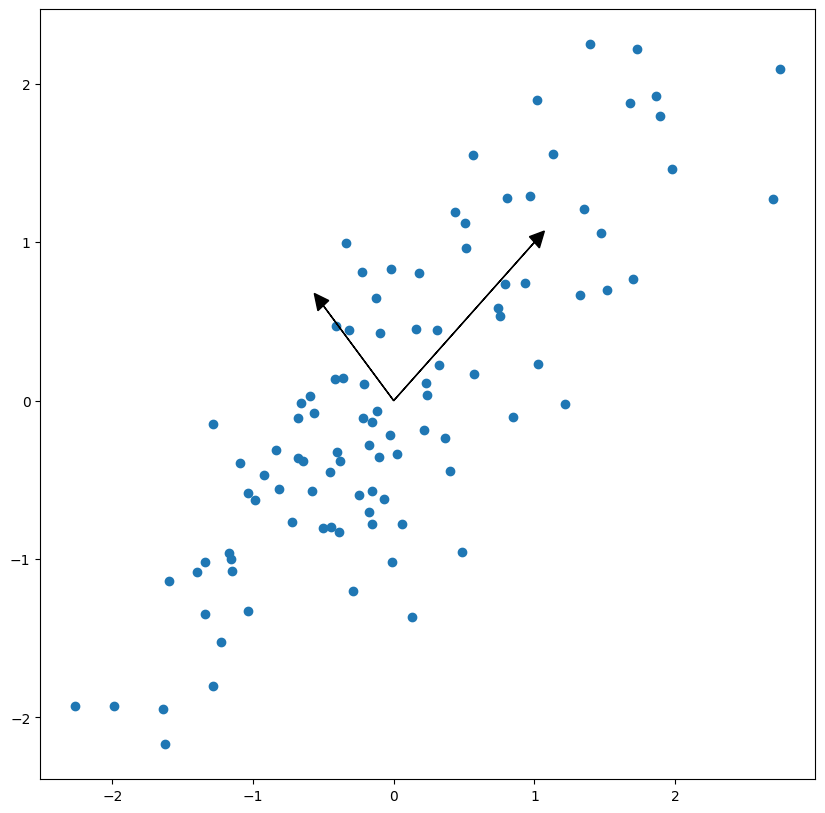

In [1]:
import numpy as np

N = 100
x = np.random.normal(3, np.sqrt(6), N)
y = 1 + 2 * x + np.random.normal(0, np.sqrt(12), N)
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()
# 画图
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
ax = plt.axes()
plt.scatter(x, y)
ax.arrow(0, 0, 1, 1, head_width=0.1, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, -0.5, 0.6, head_width=0.1, head_length=0.1, fc='k', ec='k')
plt.show()

从而对于这个2维的数据，最重要的、方差最大的成分应该是沿着回归直线方向的成分。实际上从这点来看，主成分分析无非是一种坐标变换：将坐标变换为方差最大的方向即是最大的主成分。

为了完成以上的最大化问题，主要到如果假设$X$的每个变量均值为0，那么$\Sigma=X'X$就是$X$的协方差矩阵，从而只需要将$\Sigma$矩阵进行特征值分解：$$\Sigma=\Gamma'\Lambda\Gamma$$由于$\Sigma$是实对称矩阵，所以$\Gamma$可以规范化为一个正交矩阵，而$\Lambda$为对角矩阵，由于$\Sigma$是正定矩阵，所以其特征值一定大于0，我们假设$\Lambda$中的特征值从大到小排列。那么可以构造：$$U=\Gamma_d$$其中$\Gamma_d$为$\Gamma$矩阵的前$d$列。

同时注意到，主成分分析过程中每个变量的方差是非常重要的，所以在进行主成分分析之前，不仅仅要中心化，最好还要对每个变量除以其标准差，即进行标准化。

比如，以上的x,y数据可以使用如下代码计算主成分：

In [2]:
X = np.vstack([x, y]).T
## 标准化
X = (X - X.mean(axis=0)) / X.std(axis=0)
## 计算协方差矩阵
Sigma = 1 / 100 * X.T @ X
print("协方差矩阵=\n", Sigma)
## 计算特征值特征向量
v, vec = np.linalg.eig(Sigma)
print("特征值=\n", v)
print("特征向量=\n", vec)
## 验证特征值分解
vec @ np.diag(v) @ vec.T
## 计算主成分
U = (vec.T)[:, 0]
Comp1 = X @ U
U2 = (vec.T)[:, 1]
Comp2 = X @ U2


协方差矩阵=
 [[1.         0.82305528]
 [0.82305528 1.        ]]
特征值=
 [1.82305528 0.17694472]
特征向量=
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


或者，也可以直接使用Scikit-learn中的sklearn.decomposition.PCA来进行：

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
# 打印出第一个主成分可解释的总方差的比例，即最大特征值占特征值总和的比例，
print(pca.explained_variance_ratio_)
print(1.79843409 / (1.79843409 + 0.20156591))
# 计算主成分
Comp = pca.transform(X)
# Comp

[0.91152764 0.08847236]
0.899217045


接下来我们以实际数据例子来看一下主成分分析降维的用法。以下数据包含了我国18年1月到2020年2月的国债收益率数据：

In [4]:
import pandas as pd

bond = pd.read_csv("csv/bond_interest.csv")
bond.head()

,Date,IB010007,IB010011,SH010107,SH010303,SH010504,SH010512,SH010609,SH010619,SH010706,...,IB200003,IB209901,IB209902,IB209903,IB209904,IB209905,IB209906,IB209907,IB209908,IB209909
0,2018-01-02,4.1168,3.8014,4.1168,4.2580,3.9000,3.7726,3.9000,3.8026,4.2265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-03,4.0911,3.7837,4.0911,4.2822,3.9052,3.7370,3.9122,3.7873,4.2339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-04,4.1428,3.8092,4.1428,4.3109,3.9137,3.7391,3.9216,3.8136,4.2414,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-05,4.1080,3.7726,4.1080,4.2829,3.9103,3.7046,3.9174,3.7765,4.2314,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-08,4.0987,3.7356,4.0987,4.2629,3.9036,3.6663,3.9086,3.7403,4.2214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可以看到以上数据有1699列，实际上都是国债收益率。不同债券的利率会有差异，主要是因为不同债券的到期时间不同，利率期限结构决定了即使都是无风险的国债，也会有利率上的差异。

如果需要使用利率数据，如此多的国债可以选择，可能选择哪一个都会有失偏颇。我们可以转而使用主成分分析对其进行降维。由于很多债券是刚刚发行或者已经到期，所以在某些时间某些债券的收益率数据不可用。如果我们使用整个期间段，那么结果会偏重于长期债券。我们不妨以半年为期限，以2018年上半年为例：

In [5]:
date = pd.to_datetime(bond['Date'])
bond = bond.set_index(date)
sub_bond = bond['2018-01-02':'2018-07-01']
sub_bond = sub_bond.dropna(axis=1)
# 标准化
std_sub_bond = (sub_bond.iloc[:, 1:] - sub_bond.iloc[:, 1:].mean(axis=0)
                ) / sub_bond.iloc[:, 1:].std(axis=0)
std_sub_bond

,IB010007,IB010011,SH010107,SH010303,SH010504,SH010512,SH010609,SH010619,SH010706,SH010713,...,BC170021,IB170021,IB170022,BC170023,IB170023,BC170025,IB170025,IB170026,BC170027,IB170027
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,1.145519,1.607523,1.145519,1.235691,1.231931,1.978725,1.178144,1.579299,1.293647,1.136165,...,1.137263,1.137263,1.477363,1.486544,1.486544,1.093421,1.093421,1.466402,1.249744,1.249744
2018-01-03,1.042193,1.510075,1.042193,1.329485,1.272207,1.773202,1.273046,1.495568,1.352958,1.245890,...,1.210889,1.210889,1.477363,1.373368,1.373368,1.217759,1.217759,1.466402,1.249744,1.249744
2018-01-04,1.250051,1.650466,1.250051,1.440720,1.338043,1.785326,1.346168,1.639499,1.413070,1.354092,...,1.322801,1.322801,1.477363,1.373692,1.373692,1.342098,1.342098,1.466402,1.324070,1.324070
2018-01-05,1.110139,1.448964,1.110139,1.332198,1.311709,1.586153,1.313496,1.436463,1.332920,1.284752,...,1.192115,1.192115,1.392740,1.260193,1.260193,1.258377,1.258377,1.385426,1.287650,1.287650
2018-01-08,1.072749,1.245261,1.072749,1.254683,1.259814,1.365044,1.245042,1.238354,1.252771,1.210839,...,1.100450,1.100450,1.308116,1.139256,1.139256,1.176313,1.176313,1.305260,1.249744,1.249744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-1.001411,-0.612295,-1.001411,-1.082797,-1.289976,-0.305693,-1.321994,-0.626176,-1.194182,-1.302937,...,-0.816410,-0.816410,-0.955563,-0.110526,-0.110526,-1.228396,-1.228396,-1.133740,-1.292178,-1.292178
2018-06-26,-1.057295,-0.678911,-1.057295,-1.056054,-1.330252,-0.392867,-1.332885,-0.689112,-1.234256,-1.305223,...,-0.814201,-0.814201,-1.033417,-0.159030,-0.159030,-1.395010,-1.395010,-1.218765,-1.322652,-1.322652
2018-06-27,-1.061316,-0.693776,-1.061316,-1.140933,-1.401510,-0.392290,-1.487685,-0.707171,-1.312802,-1.503338,...,-0.871630,-0.871630,-1.043572,-0.159030,-0.159030,-1.616333,-1.616333,-1.218765,-1.310760,-1.310760


如此，我们就跳出了一个不包含缺失变量的样本。

然后进行主成分分析，我们选取前5个主成分：

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(std_sub_bond)
# 打印出第一个主成分可解释的总方差的比例，即最大特征值占特征值总和的比例，
print(pca.explained_variance_ratio_)
# 计算主成分
Comp = pca.transform(std_sub_bond)
# 放入dataframe中
sub_bond['Comp1'] = Comp[:, 0]
sub_bond['Comp2'] = Comp[:, 1]
sub_bond

[0.94147679 0.04165834 0.00702729 0.00335977 0.00150169]


,Date,IB010007,IB010011,SH010107,SH010303,SH010504,SH010512,SH010609,SH010619,SH010706,...,IB170022,BC170023,IB170023,BC170025,IB170025,IB170026,BC170027,IB170027,Comp1,Comp2
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018-01-02,4.1168,3.8014,4.1168,4.2580,3.9000,3.7726,3.9000,3.8026,4.2265,...,4.3700,3.7699,3.7699,3.9000,3.9000,4.4226,3.9000,3.9000,30.360802,5.108068
2018-01-03,2018-01-03,4.0911,3.7837,4.0911,4.2822,3.9052,3.7370,3.9122,3.7873,4.2339,...,4.3700,3.7349,3.7349,3.9150,3.9150,4.4226,3.9000,3.9000,30.397110,3.527838
2018-01-04,2018-01-04,4.1428,3.8092,4.1428,4.3109,3.9137,3.7391,3.9216,3.8136,4.2414,...,4.3700,3.7350,3.7350,3.9300,3.9300,4.4226,3.9100,3.9100,31.795481,3.452123
2018-01-05,2018-01-05,4.1080,3.7726,4.1080,4.2829,3.9103,3.7046,3.9174,3.7765,4.2314,...,4.3600,3.6999,3.6999,3.9199,3.9199,4.4126,3.9051,3.9051,29.245293,2.162864
2018-01-08,2018-01-08,4.0987,3.7356,4.0987,4.2629,3.9036,3.6663,3.9086,3.7403,4.2214,...,4.3500,3.6625,3.6625,3.9100,3.9100,4.4027,3.9000,3.9000,26.808093,0.932411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,2018-06-25,3.5828,3.3982,3.5828,3.6598,3.5744,3.3769,3.5786,3.3996,3.9161,...,4.0825,3.2760,3.2760,3.6199,3.6199,4.1015,3.5580,3.5580,-19.833129,7.707087
2018-06-26,2018-06-26,3.5689,3.3861,3.5689,3.6667,3.5692,3.3618,3.5772,3.3881,3.9111,...,4.0733,3.2610,3.2610,3.5998,3.5998,4.0910,3.5539,3.5539,-20.812740,7.560393
2018-06-27,2018-06-27,3.5679,3.3834,3.5679,3.6448,3.5600,3.3619,3.5573,3.3848,3.9013,...,4.0721,3.2610,3.2610,3.5731,3.5731,4.0910,3.5555,3.5555,-21.981982,8.135084


可以发现第一个主成分基本上已经包含了94%的信息，前两个主成分更是包含了98%的信息，剩下的成分信息已经非常少。

值得注意的是，生成的主成分的符号是没有意义的：特征向量的符号是没有意义的，所以实际得到的主成分完全有可能与实际数据负相关，在使用主成分时需要特别注意。

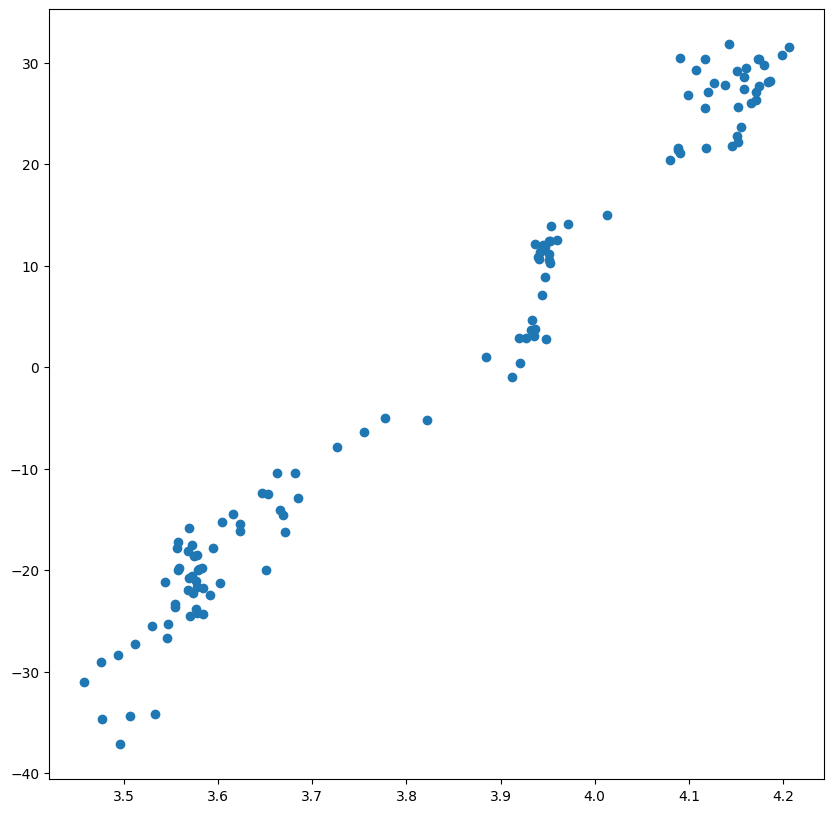

In [7]:
plt.scatter(sub_bond['IB010007'],sub_bond['Comp1'])
plt.show()

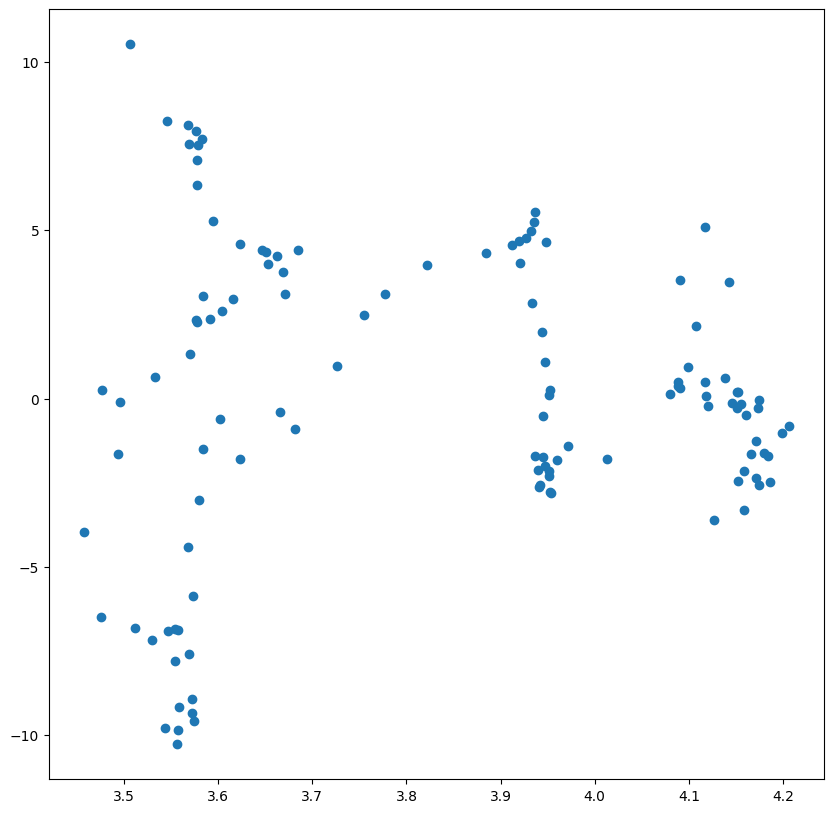

In [8]:
plt.scatter(sub_bond['IB010007'],sub_bond['Comp2'])
plt.show()

可以看到第一个主成分和某个债券的利率已经是非常高度相关了。

最后，在使用主成分时，结合计量经济学，还有几点需要提醒：

* 主成分非常适合多个不相同但是类似的度量，如果不同变量之间差异极大，主成分分析也需要更多的主成分才能比较好的保留信息
* 主成分分析得到的主成分是方差最大的一部分信息，然而实际研究中，最有用的信息不一定是方差最大的信息。一个简单的例子，债券利率中方差最大的一部分信息一定是市场的利率，然而不同到期时间的债券之间收益率的差别，虽然方差微小，然而作为固定收益分析的重要工具，肯定不能说这些信息没用，甚至这些信息才是最有用的。
* 基于以上原因，因果推断中慎用主成分：我们使用控制变量的主要原因就是为了得到那部分虽然微小但是足以说明因果性的那部分信息，主成分完全有可能把这部分信息过滤掉。

# 多维缩放

**多维缩放**（**multiple dimensional scaling, MDS**）与主成分分析紧密相关的一个方法，不过多维缩放提供了降维方法的另一个视角：**嵌入**（**embedding**）。

所谓嵌入，即从高维空间向低维空间的一个映射，而这个映射需要尽量保持高维空间的距离。比如地图就是现实生活中最常用的嵌入应用。一个城市的路网是三维的，会有高架桥、隧道等等，然而对于我们出行而言，实际上并不需要一个三维地图，我们将路网映射到一张二维的平面地图上，仍然不会损失太多的信息。而且重要的是，在这张地图上，两个点之间的距离是比例于现实世界的距离的。

现在，我们仍然考虑$x_i\in \mathbb{R}^D, i=1,...,N$，以及$N\times D$维的矩阵$X=\left[x_1',x_2',...,x_N'\right]'$。我们可以定义这$N$个点的一个距离矩阵$$D=[d_{ij}]$$其中$d_{ij}$为$x_i$和$x_j$之间的距离。

实际上，除了欧式距离：$$d_{ij}=\sqrt{\left(x_i-x_j\right)'\left(x_i-x_j\right)}$$之外，还有很多其他的距离定义方式，使用不同的距离定义方式会得到不同的结果。一般的，MDS算法寻求找到一个映射$x_i\rightarrow y_i$使得：$$\sum_{i,j=1,...,N}\left[dist\left(x_i,x_j\right)-dist\left(y_i,y_j\right)\right]$$


不过，由于欧式距离可以通过内积定义，分析起来非常方便，我们以欧式距离定义为例。

现在，我们要找到样本在$d$维空间的映射，即将每一个$x_i$找到一个$y_i$的对应，并且使得$$||x_i-x_j||_2\approx ||y_i-y_j||_2$$我们不妨假设$y_i$是中心化的，即假设：$\sum _{i=1}^N y_i=0$，我们可以计算一个$N\times N$的内积矩阵：$$\Omega = Y\times Y'$$其中$Y=\left[y_1',y_2',...,y_N'\right]'$为$N\times d$的矩阵。

可以发现，矩阵$\Omega$的第$i$行第$j$列就是$y_i$和$y_j$的内积，那么$y_i,y_j$之间的距离应该为$$||y_i-y_j||^2_2=\left(y_i-y_j\right)'\left(y_i-y_j\right)'=\Omega_{jj}+\Omega_{ii}-2\Omega_{ij}$$我们要求：$||y_i-y_j||_2\approx ||x_i-x_j||_2$不妨取以上的等号成立，那么我们可以通过$x_i,x_j$之间的距离矩阵$D$反过来计算出$\Omega$矩阵。

当我们计算得到$\Omega$矩阵之后，可以通过特征值分解：$$\Omega=\Gamma'\Lambda\Gamma$$同样该矩阵是一个实对称的正定矩阵，假设所有的特征值从大到小排列，我们选$\Lambda$的前$d$行$d$列为$\Lambda^*$，以及$\Gamma$的前$d$行为$\Gamma^*$，并根据：$$Y=\Gamma^{*'}\Lambda^{*\frac{1}{2}}$$就可以计算嵌入的$Y$了。

虽然出发点不同、计算方法不同，不过如果我们使用了欧氏距离来度量原始数据之间的距离，那么多位缩放和主成分分析实际上是等价的。不过多位缩放技术给我们打开了降维方法的一扇大门：通过嵌入的方法将高维空间映射到低维空间。接下来的流形学习就是在此基础上进行拓展的。

# 流形学习

**流形**（**manifold**）是一个几何学的术语，指的是在局部与欧式空间同胚的空间，即在局部与欧式空间类似的一个空间。比如对于地球而言，虽然是一个球体，但是在一个小的范围内，我们可以把一小块土地看成是一个二维平面，可以使用欧式距离来进行距离测算，而不用复杂的球面距离。

这启发了流形学习，即也许高维空间中的数据并不是真的非常高维，而是有低维的结构，如果我们能够找到这样的结构，在每个局部都看成是一个低维空间，再一块块的将这个高维空间的结构映射到低维空间，那么就完成了降维。

以上思想可以用下图表示：

![](pic/manifold.png "流形学习")

像上图的这种S型曲面，实际上是一个在三维空间中的一个低维空间，我们可以想象是一张纸巾飘在空中：虽然纸巾在空中可以有各种各样的姿态，但是其本质还是一个二维平面。流形学习的目的就是为了将这样的一个三维空间的复杂集合映射到一个低维空间中去。

可以看到，上图中的MDS算法并不能够很好的完成这项任务：MDS试图还原所有的点到点的欧式距离，这就会把三维空间中的形态信息带入到二维空间中去，然而这种形态信息可能是不必要的，所以MDS没能会很好的将额外的维度压缩掉。而我们接下来要讲的Isomap等算法可以很好的完成这个任务。

Isomap算法建立在MDS基础之上，区别在于：MDS算法要求经过嵌入操作后，所有的两个点之间的距离都要与高维空间中的距离相似。而**Isomap**（**isometric mapping**）即**等距映射**（或者等度量映射），并不寻求所有的点和点之间的距离与高维空间中的距离相似，而是只要在每一个局部保持等距离即可。

比如，在上面的S形曲面中，虽然位于S右上和左下的两个点在三维空间中似乎看起来距离并不算太长，但是如果考虑到沿着S形曲面从右上走到左下，实际上要经过两个大的“弯道”，其在二维S形曲面上的面积实际上是非常远的。

如果使用MDS算法，将会在嵌入的二维空间中模仿三维空间中的距离，所以得到的嵌入结果仍然是一个S形的。然而如果使用Isomap算法，S右上和左下的两个点之间的距离并不会被直接度量，而是一个局部一个局部的拼凑起来，那么这两个点之间的距离就要沿着S形曲面从头到尾走一遍了，距离就比较长了。

为了计算这个等距映射，可以考虑给定对于每一个点，都找到与其距离（比如欧氏距离）最近的$k$个点，假设每个点只与最近的$k$个点连通，这样，每个点之间就形成了一个**图**（**graph**）。

比如，如果我们考虑我国的所有城市，MDS的做法相当于坐飞机：任意的两个城市之间可以用直线连接起来。而Isomap的做法相当于坐火车：火车不可能跳跃，比如不可能从上海直接跳跃到南京去，从上海出发一定要先经过苏州、无锡、常州才能到达南京。所以我们只考虑每个城市有火车相通的临近城市，并使用城市之间的铁路连接构成一个“临近连接图”。

给定这个临近连接图，从任意一点A到任意一点B，如果经过每个节点，下一步只能走进最近的$k$个节点，那么就有很多中不同的路径，我们将A和B之间的距离定义为其最短路径。比如，我们如果想要从上海到南京，可以上海-苏州-无锡-常州-南京，也可以上海-嘉兴-杭州-湖州-宜兴-南京，然而我们知道第二条路线更远：绕过了太湖！所以上海和南京之间的距离并非由这两个点之间的欧式距离决定的，而是由上海-苏州-无锡-常州-南京的铁路距离决定的。

图上的最短路径问题可以使用Dijkstra算法求解，是计算机领域十分成熟的算法。这样，我们就将所有点和点之间的距离使用这种“近邻连接图”的方式定义出了一个全新的距离。

使用该距离，继续使用MDS算法，就得到了一个新的嵌入结果。这个算法即Isomap。

下面，作为例子，我们使用一份百度迁徙数据提供的某个年份春运时城市和城市之间的迁徙人数对我国城市进行一个“迁徙距离”的度量。

首先载入数据：

In [9]:
import json
with open('csv/migration.json') as f:
    migration_str = f.read()
migration_json = json.loads(migration_str)
mig_data = pd.DataFrame(migration_json['allLine'])
mig_data

,start,end,num,singleNum
0,北京_北京,河北_保定,1919,1919
1,北京_北京,河北_廊坊,1211,1211
2,北京_北京,河北_张家口,1127,1127
3,江苏_苏州,上海_上海,969,969
4,广东_深圳,广西_玉林,902,902
...,...,...,...,...
3995,山东_青岛,山西_长治,9,9
3996,广西_南宁,浙江_温州,9,9
3997,广西_南宁,河南_郑州,9,9
3998,江苏_泰州,安徽_淮北,9,9


注意以上的数据并不是一个足够好的数据：可能存在南宁到温州，但是没有温州到南宁的数据，为此，我们先把所有的城市列表整理出来，然后形成一个城市×城市的新的空数据集：

In [10]:
del mig_data['singleNum']
city_set = set(mig_data['start'])
city_set2 = set(mig_data['end'])
city_set.update(city_set2)
city_index = pd.Series(list(city_set))
mid_data_matrix = pd.DataFrame(np.zeros((len(city_set), len(city_set))))
mid_data_matrix = mid_data_matrix.set_index(city_index)
mid_data_matrix = mid_data_matrix.T.set_index(city_index)
mid_data_matrix = mid_data_matrix.stack()
mid_data_matrix = pd.DataFrame({'zeros': mid_data_matrix})
mid_data_matrix.index.names = ['start', 'end']
mid_data_matrix

zeros
start    end            
宁夏_固原    宁夏_固原       0.0
         湖北_襄阳       0.0
         黑龙江_黑河      0.0
         天津_天津       0.0
         新疆_喀什       0.0
...                  ...
黑龙江_大兴安岭 辽宁_铁岭       0.0
         黑龙江_哈尔滨     0.0
         四川_内江       0.0
         海南_临高       0.0
         黑龙江_大兴安岭    0.0

[117649 rows x 1 columns]

可以看到数据集中总共有343个城市，从而上面的matrix共有343×343=117649行。

接下来将迁徙数据设定索引：

In [11]:
mig_data = mig_data.set_index(['start', 'end'])
mig_data = mig_data.sort_index()
mig_data

num
start    end          
上海_上海    云南_昆明      29
         云南_曲靖      10
         内蒙古_乌兰察布   11
         北京_北京     144
         台湾_台北      23
...                ...
黑龙江_牡丹江  北京_北京       9
黑龙江_黑河   内蒙古_呼伦贝尔   15
黑龙江_齐齐哈尔 内蒙古_兴安盟    18
         内蒙古_呼伦贝尔   61
         北京_北京      13

[4000 rows x 1 columns]

然后将两者合并，从而获得了一个117649行的新数据，如果两个地方之间没有迁徙数据，那么就是NaN：

In [12]:
mig_data = pd.merge(mig_data,
                    mid_data_matrix,
                    how='outer',
                    left_index=True,
                    right_index=True)
mig_data

num  zeros
start    end                 
上海_上海    上海_上海     NaN    0.0
         云南_临沧     NaN    0.0
         云南_丽江     NaN    0.0
         云南_大理     NaN    0.0
         云南_文山     NaN    0.0
...                ...    ...
黑龙江_齐齐哈尔 黑龙江_绥化    NaN    0.0
         黑龙江_鸡西    NaN    0.0
         黑龙江_鹤岗    NaN    0.0
         黑龙江_黑河    NaN    0.0
         黑龙江_齐齐哈尔  NaN    0.0

[117649 rows x 2 columns]

接着整理为迁徙矩阵：

In [13]:
mig_data = mig_data.fillna(0)
mig_data = mig_data['num']
mig_data = mig_data.unstack()
mig_data

end,上海_上海,云南_临沧,云南_丽江,云南_大理,云南_文山,云南_昆明,云南_昭通,云南_普洱,云南_曲靖,云南_楚雄,...,黑龙江_双鸭山,黑龙江_哈尔滨,黑龙江_大兴安岭,黑龙江_大庆,黑龙江_牡丹江,黑龙江_绥化,黑龙江_鸡西,黑龙江_鹤岗,黑龙江_黑河,黑龙江_齐齐哈尔
start,,,,,,,,,,,,,,,,,,,,,
上海_上海,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,10.0,0.0,...,0.0,55.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,11.0
云南_临沧,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
云南_丽江,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
云南_大理,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
云南_文山,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江_绥化,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
黑龙江_鸡西,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
黑龙江_鹤岗,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


计算距离矩阵。注意距离的定义要求A到B的距离等于B到A的距离。所以我们首先要将其变为一个对称矩阵（$X+X'$就是一个对称矩阵了），此外两个城市之间的迁徙人数越多则距离越近，所以我们需要进行一定的转换：

In [14]:
# 取log，相当于百分比距离
dist = (np.log(1 + mig_data) + np.log(1 + mig_data.T)) / 2
# 迁徙人数越多，距离越近，所以取相反数；为了保证距离为正，加上所有距离的最大值
dist = dist.max().max() - dist + 1
# 自己到自己的距离为0，需要额外处理：
EYE = pd.DataFrame(np.eye(dist.shape[0])).set_index(dist.index).T.set_index(
    dist.index)
dist = dist - dist.iloc[0, 0] * EYE
dist

end,上海_上海,云南_临沧,云南_丽江,云南_大理,云南_文山,云南_昆明,云南_昭通,云南_普洱,云南_曲靖,云南_楚雄,...,黑龙江_双鸭山,黑龙江_哈尔滨,黑龙江_大兴安岭,黑龙江_大庆,黑龙江_牡丹江,黑龙江_绥化,黑龙江_鸡西,黑龙江_鹤岗,黑龙江_黑河,黑龙江_齐齐哈尔
start,,,,,,,,,,,,,,,,,,,,,
上海_上海,0.000000,7.902833,7.902833,7.902833,7.902833,4.815940,7.902833,7.902833,6.703885,7.902833,...,7.902833,5.890157,7.902833,7.902833,6.620358,7.902833,7.902833,7.902833,7.902833,6.660380
云南_临沧,7.902833,0.000000,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833
云南_丽江,7.902833,7.902833,0.000000,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833
云南_大理,7.902833,7.902833,7.902833,0.000000,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833
云南_文山,7.902833,7.902833,7.902833,7.902833,0.000000,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑龙江_绥化,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,0.000000,7.902833,7.902833,7.902833,7.902833
黑龙江_鸡西,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,0.000000,7.902833,7.902833,7.902833
黑龙江_鹤岗,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,...,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,7.902833,0.000000,7.902833,7.902833


接下来就可以使用Scikit-learn中的Isomap进行训练了。

在使用该方法时，需要提供：

* n_neighbors:将最近的多少个点视为邻居？
* n_components：嵌入到多少维的空间？
* metric：使用何种距离度量？对于一般数据集而言，欧氏距离、马氏距离等都可以使用，或者可以设定为"precomputed"，即已经计算好的距离矩阵

注意如果我们是一个$N\times K$的数据集，即$N$个样本点，$K$个特征，我们完全可以使用Isomap对象自动计算$N\times N$的距离矩阵。不过在这里，我们上面的数据是已经计算好的$N\times N$的距离矩阵，所以只需要设定为"precomputed"即可。

In [15]:
from sklearn.manifold import Isomap

embedding = Isomap(n_neighbors=8, n_components=2, metric="precomputed")
coordinates = embedding.fit_transform(dist)
dist['x'] = coordinates[:, 0]
dist['y'] = coordinates[:, 1]
dist.iloc[:, -2:]


end,x,y
start,,
上海_上海,-1.992665,0.106905
云南_临沧,6.413352,5.949499
云南_丽江,3.539024,1.778862
云南_大理,1.303765,0.068470
云南_文山,-1.682454,6.540387
...,...,...
黑龙江_绥化,-3.573274,-1.383274
黑龙江_鸡西,1.786944,-4.978355
黑龙江_鹤岗,2.005302,-5.047238


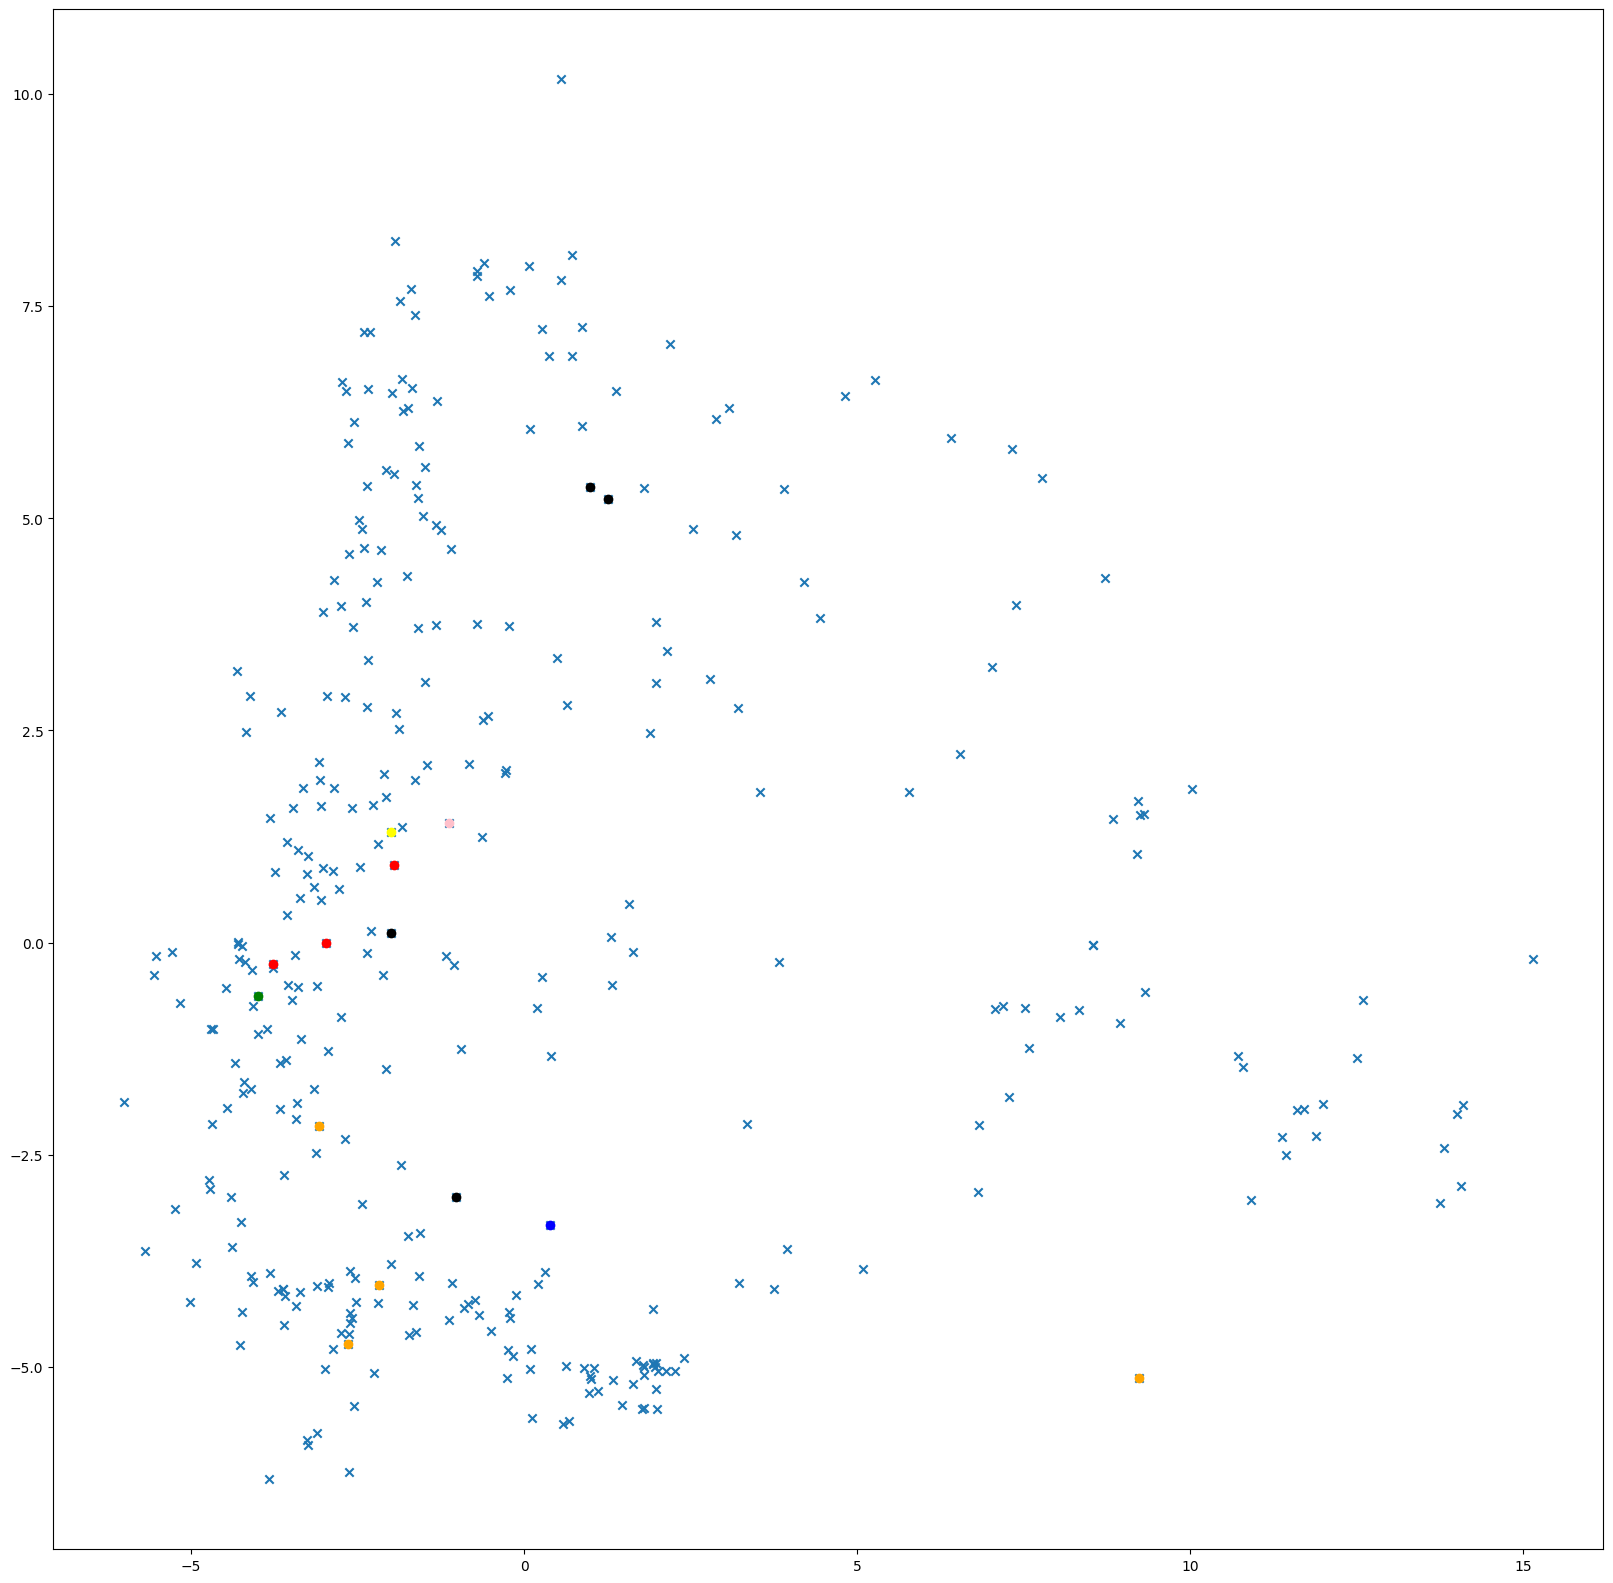

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.scatter(dist['x'],dist['y'], marker="x")
city_list=["上海_上海","北京_北京","广东_广州","广东_深圳"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='black')
city_list=["浙江_杭州","江苏_南京","湖南_长沙"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='red')
city_list=["山东_济南","河北_石家庄","辽宁_沈阳","新疆_乌鲁木齐"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='orange')
city_list=["陕西_西安"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='blue')
city_list=["陕西_渭南"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='green')
city_list=["四川_成都"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='pink')
city_list=["湖北_武汉"]
plt.scatter(dist['x'][city_list],dist['y'][city_list], color='yellow')
plt.show()

此外，还有**局部线性嵌入**（**locally linear embedding, LLE**）的方法。Isomap是保持局部的距离结构，而LLE则是保持局部的线性关系。所谓线性关系，即在某个点$x$的邻域中，找到另外的几个临近的样本$x_1,x_2,x_3,..,x_k$使得：$$x=\omega_1 x_1+\omega_2 x_2+\cdots+\omega_k x_k$$LLE要求如果在高维空间中有如上的线性结构，那么嵌入到低维空间中仍然保持这样的线性结构。在此我们不再赘述。